# CodeAlpha Machine Learning Internship Task#1

# Credit scoring prediction RandomForestClassifier

### Importing Necessory Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

### Read and know the shape of our dataset

In [3]:
dataset=pd.read_excel("pp.xlsx")

In [4]:
dataset.shape

(3000, 30)

In [5]:
dataset.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


### cleaning dataset 

In [6]:
df1=dataset.drop(columns="ID")
df1.shape

(3000, 29)

In [7]:
df1.isnull().sum()

TARGET               0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64

In [8]:
df2=df1.fillna(df1.mean())
df2.isnull().sum()

TARGET             0
DerogCnt           0
CollectCnt         0
BanruptcyInd       0
InqCnt06           0
InqTimeLast        0
InqFinanceCnt24    0
TLTimeFirst        0
TLTimeLast         0
TLCnt03            0
TLCnt12            0
TLCnt24            0
TLCnt              0
TLSum              0
TLMaxSum           0
TLSatCnt           0
TLDel60Cnt         0
TLBadCnt24         0
TL75UtilCnt        0
TL50UtilCnt        0
TLBalHCPct         0
TLSatPct           0
TLDel3060Cnt24     0
TLDel90Cnt24       0
TLDel60CntAll      0
TLOpenPct          0
TLBadDerogCnt      0
TLDel60Cnt24       0
TLOpen24Pct        0
dtype: int64

### Our dataset is imbalance we have ratio of 1:4 in target variable we have to balance that proportion 

In [9]:
df2['TARGET'].value_counts()

TARGET
0    2500
1     500
Name: count, dtype: int64

## Using Over sampling technique we balance our data now we have ratio of 1:1 in our dataset

In [10]:
df_0=df2[df2['TARGET']==0]
df_1=df2[-(df2['TARGET']==0)]
value_count_1=df_1.shape[0]
value_count_0=df_0.shape[0]
df_1_over=df_1.sample(value_count_0,replace=True)
df3=pd.concat([df_1_over,df_0],axis=0)
df3.shape
df3['TARGET'].value_counts()

TARGET
1    2500
0    2500
Name: count, dtype: int64

## Splitting dataset into training and testing part

In [11]:
x=df3.drop(columns="TARGET")
y=df3[['TARGET']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [12]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4000, 28), (1000, 28), (4000, 1), (1000, 1))

## Data Preprocessing , Scaling data by StandardScaler from sklearn

In [13]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

## Using RandomForest Classifier for model building

In [14]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

C:\Users\Arham khan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

## We got accuracy of 96.1 percent by using RandomForestClassifier

In [21]:
accuracy=(model.score(x_test,y_test))*100
accuracy

96.1

## Testing the model with test dataset

In [16]:
predicted=model.predict(x_test)

## Classification Report, We got Precision , recall , F1 score for both classes about 90 percent which is pretty good

In [19]:
print(cr(y_test,predicted))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       495
           1       0.94      0.98      0.96       505

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



## Cofusion matrix to know the accuracy of model

Text(95.72222222222221, 0.5, 'Truth')

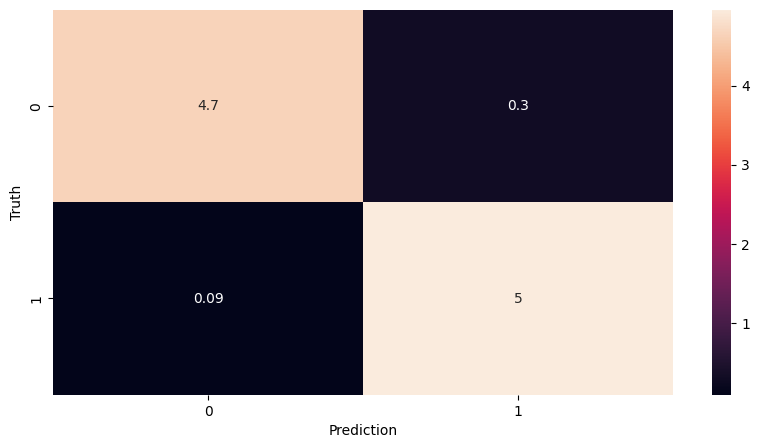

In [20]:
cmm=cm(y_test,predicted)/100
plt.figure(figsize=(10,5))
sb.heatmap(cmm,annot=True)
plt.xlabel("Prediction")
plt.ylabel("Truth")

# Thank You 